<a href="https://colab.research.google.com/github/Ramshankar07/TeslaStockprediction/blob/main/Stock_price_prediction_using_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tesla (TSLA) Stock Price prediction using Facebook Prophet 

In [ ]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [ ]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization
import pandas as pd
from fbprophet import Prophet
import plotly.express as  px

In [ ]:
import plotly.io as pio

In [ ]:
 #Initializing Plotly

## Importing the Dataset & Exploring it

In [ ]:
df=pd.read_csv('/content/TSLA (1).csv')

In [ ]:
#read_csv function from pandas

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-11-27,581.159973,598.780029,578.450012,585.760010,585.760010,37561100
1,2020-11-30,602.210022,607.799988,554.510010,567.599976,567.599976,63003100
2,2020-12-01,597.590027,597.849976,572.049988,584.760010,584.760010,40103500
3,2020-12-02,556.440002,571.539978,541.210022,568.820007,568.820007,47775700
4,2020-12-03,590.020020,598.969971,582.429993,593.380005,593.380005,42552000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,741.321707,756.697101,725.471310,742.335912,742.335912,3.032382e+07
std,141.519378,146.258906,138.389697,142.802191,142.802191,1.830293e+07
min,552.549988,566.210022,539.489990,563.000000,563.000000,9.800600e+06
25%,651.734985,664.242492,630.092483,650.419983,650.419983,1.998042e+07
50%,704.285004,715.309998,685.024994,703.359985,703.359985,2.634000e+07
75%,787.312515,800.190018,776.545014,791.504989,791.504989,3.559498e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,2.221262e+08


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [ ]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [ ]:
px.area(df,x="Date",y="Close")

In [ ]:
px.area(df,x='Date',y='Volume')

# Understanding Facebook Prophet

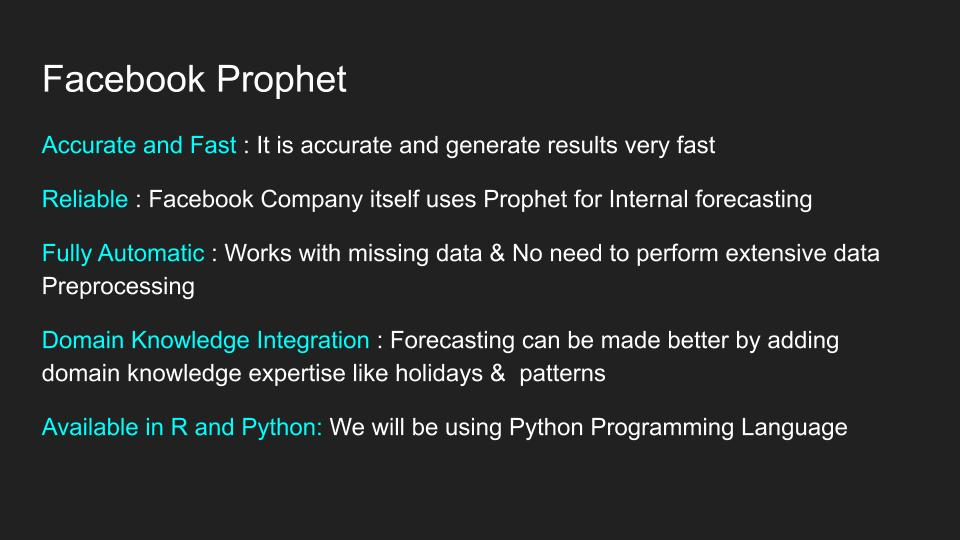

## Data Preperation

In [ ]:
col=['Date',"Close"]
adf=pd.DataFrame(df,columns=col)
adf

,Date,Close
0,2020-11-27,585.760010
1,2020-11-30,567.599976
2,2020-12-01,584.760010
3,2020-12-02,568.820007
4,2020-12-03,593.380005
...,...,...
247,2021-11-19,1137.060059
248,2021-11-22,1156.869995
249,2021-11-23,1109.030029
250,2021-11-24,1116.000000


In [ ]:
prophet_df=adf.rename(columns={'Date':'ds','Close':'y'})
prophet_df

## Creating Facebook Prophet Model

In [ ]:
a=Prophet()
a.fit(prophet_df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##Forecasting

In [ ]:
fore=a.make_future_dataframe(periods=30)
forecast=a.predict(fore)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-11-27,607.485318,541.758513,682.468602,607.485318,607.485318,6.683346,6.683346,6.683346,6.683346,6.683346,6.683346,0.0,0.0,0.0,614.168664
1,2020-11-30,617.112147,553.716156,691.365910,617.112147,617.112147,4.758988,4.758988,4.758988,4.758988,4.758988,4.758988,0.0,0.0,0.0,621.871135
2,2020-12-01,620.321090,550.496752,694.975827,620.321090,620.321090,4.090903,4.090903,4.090903,4.090903,4.090903,4.090903,0.0,0.0,0.0,624.411993
3,2020-12-02,623.530033,553.650957,696.739361,623.530033,623.530033,3.912569,3.912569,3.912569,3.912569,3.912569,3.912569,0.0,0.0,0.0,627.442602
4,2020-12-03,626.738976,558.885015,702.094745,626.738976,626.738976,5.431680,5.431680,5.431680,5.431680,5.431680,5.431680,0.0,0.0,0.0,632.170656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,2021-12-22,1281.451699,1212.560011,1358.109092,1268.085773,1295.041517,3.912569,3.912569,3.912569,3.912569,3.912569,3.912569,0.0,0.0,0.0,1285.364268
278,2021-12-23,1286.935849,1216.590980,1366.729683,1272.894262,1301.408343,5.431680,5.431680,5.431680,5.431680,5.431680,5.431680,0.0,0.0,0.0,1292.367529
279,2021-12-24,1292.419999,1229.453476,1376.221430,1277.234036,1307.679230,6.683346,6.683346,6.683346,6.683346,6.683346,6.683346,0.0,0.0,0.0,1299.103345
280,2021-12-25,1297.904149,1214.507313,1357.201906,1281.849973,1314.237272,-12.438742,-12.438742,-12.438742,-12.438742,-12.438742,-12.438742,0.0,0.0,0.0,1285.465407


In [ ]:
px.line(forecast,x='ds',y='yhat')

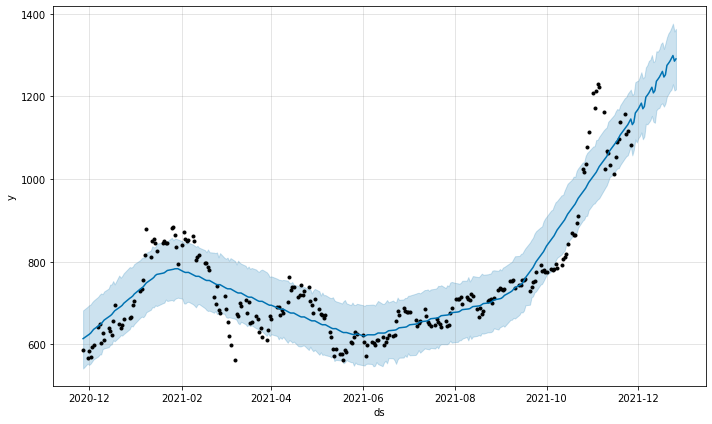

In [ ]:
fig=a.plot(forecast,xlabel='ds',ylabel='y')

##Downloading the Forecast data

In [ ]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')